# Regression

## Problem definition

$X_i=(x_{i1},x_{i2},\ldots,x_{ip})$ - single observation with $p$ features \
$y_i\in\mathbb{R}$ - output value \
$f(X_i)=\hat{y}_i\approx y_i$ - prediction

## Metrics

$e_t=y_t-\hat{y}_t$
![](media\metrics.png)

$\operatorname{SSE}=\sum_{i=1}^n{\left(y_i-\hat{y}_i\right)^2}$ \
$\operatorname{SST}=\sum_{i=1}^n{\left(y_i-\bar{y}\right)^2}$
$$R^2=1-\frac{\operatorname{SSE}}{\operatorname{SST}}$$

In [562]:
import numpy as np
from sklearn.metrics import (mean_absolute_error as mae, 
                             mean_squared_error as mse, 
                             mean_absolute_percentage_error as mape, 
                             r2_score as r2)
rmse = lambda y_true, y: np.sqrt(mse(y_true, y))

## Algorithms

<AxesSubplot:>

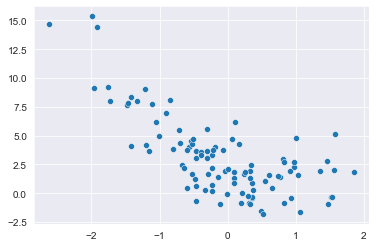

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


### Linear Regression

$$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\ldots\beta_px_{ip}+\varepsilon_i=X_i\beta^T+\varepsilon_i$$
$X_i=(1,x_{i1},x_{i2},\ldots,x_{ip})$ - little modification to the input data \
$\forall_i\:\varepsilon_i\sim\mathcal{N}(0,\sigma)$ - "random" error \
$\forall_{i\neq j}\:\varepsilon_i\perp \!\!\! \perp\varepsilon_j$ \
$\beta=(\beta_1,\beta_2,\ldots,\beta_p)$ - parameters to estimate (learn)

#### Analytical solution

$X=(X_1,X_2,\ldots,X_n)^T=\begin{bmatrix}
1&x_{11}&\ldots&x_{1p}\\
1&x_{21}&\ldots&x_{2p}\\
\vdots&\vdots&\ddots&\vdots\\
1&x_{n1}&\ldots&x_{np}\\
\end{bmatrix}$ \
$Y=(y_1,\ldots,y_n)^T$ \
$\hat{y}_i=X_i\hat{\beta}^T$ \
$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$ \
$$\frac{\partial L}{\partial \hat{\beta}}=X^TX\beta-X^TY$$
$$\hat{\beta}=\left(X^TX\right)^{-1}X^TY$$

#### Gradient Descent

$$\hat{\beta}^{(n+1)}=\hat{\beta}^{(n)}-\alpha\nabla L\left(\hat{\beta}\right)=\hat{\beta}^{(n)}-\alpha\frac{ \partial L}{\partial \hat{\beta}}=\hat{\beta}^{(n)}-\alpha\left(X^TX\beta-X^TY\right)=\hat{\beta}^{(n)}+\alpha\sum_{i=1}^n{X_i\left(y_i-\hat{y}_i\right)}$$

![](media\gradient_descent.png)

<AxesSubplot:>

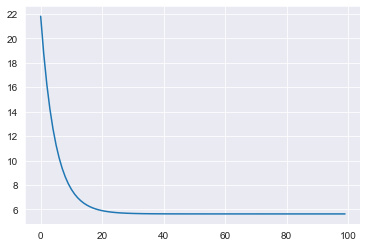

<AxesSubplot:>

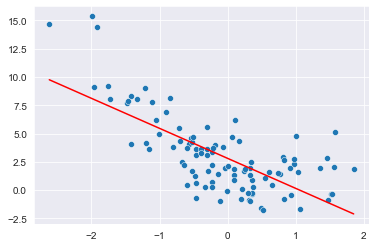

#### Train/Test Split

rmse: 2.339594297601196 
mae: 1.8996893938786683 
mape: 2.2447475229216325 
r^2: 0.2858182939449756


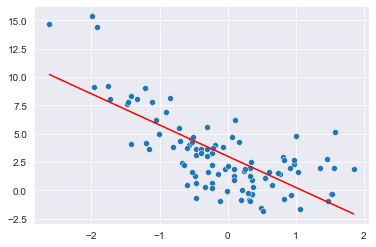

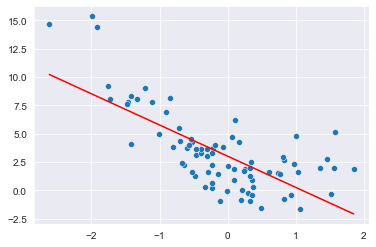

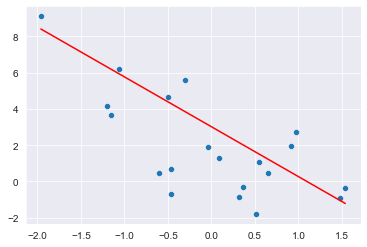

### Regularized Linear Regression

#### Ridge Regression

$\hat{y}_i=X_i\hat{\beta}^T$ \
$$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\alpha\sum_{i=1}^p{\beta_i^2}$$

rmse: 2.338907599679912 
mae: 1.8992624266062195 
mape: 2.2437817467287897 
r^2: 0.2862374735612574


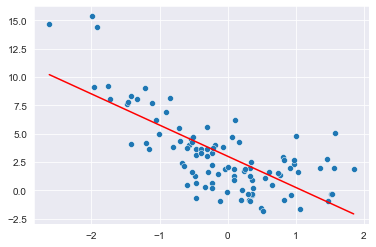

#### Lasso Regression

$\hat{y}_i=X_i\hat{\beta}^T$ \
$$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\alpha\sum_{i=1}^p{|\beta_i|}$$

rmse: 2.3221285352003593 
mae: 1.8932976771676047 
mape: 2.2232417031473206 
r^2: 0.2964416468656301


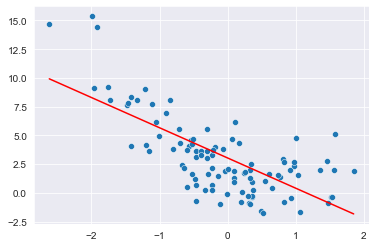

#### Elastic Net Regression

$\hat{y}_i=X_i\hat{\beta}^T$ \
$$L\left(\hat{\beta}\right)=\frac{1}{2}\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\alpha\left(r\sum_{i=1}^p{|\beta_i|}+(1-r)\sum_{i=1}^p{\beta_i^2}\right)$$

rmse: 2.312317163992694 
mae: 1.8988797634086936 
mape: 2.218219070188307 
r^2: 0.3023743841667166


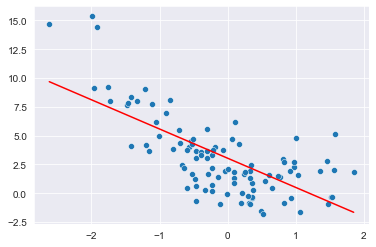

### Polynomial Regression

1. Extend features from $\{x_1,\ldots,x_p\}$ to $\left\{x_1^{d_1}x_2^{d_2}\ldots x_p^{d_p}:\: \sum_{i=1}^p{d_i}\le d\right\}$
2. Apply linear regression

array([[ 1.00000000e+00,  4.96714153e-01,  2.46724950e-01],
       [ 1.00000000e+00, -1.38264301e-01,  1.91170170e-02],
       [ 1.00000000e+00,  6.47688538e-01,  4.19500442e-01],
       [ 1.00000000e+00,  1.52302986e+00,  2.31961994e+00],
       [ 1.00000000e+00, -2.34153375e-01,  5.48278029e-02],
       [ 1.00000000e+00, -2.34136957e-01,  5.48201146e-02],
       [ 1.00000000e+00,  1.57921282e+00,  2.49391312e+00],
       [ 1.00000000e+00,  7.67434729e-01,  5.88956064e-01],
       [ 1.00000000e+00, -4.69474386e-01,  2.20406199e-01],
       [ 1.00000000e+00,  5.42560044e-01,  2.94371401e-01],
       [ 1.00000000e+00, -4.63417693e-01,  2.14755958e-01],
       [ 1.00000000e+00, -4.65729754e-01,  2.16904203e-01],
       [ 1.00000000e+00,  2.41962272e-01,  5.85457409e-02],
       [ 1.00000000e+00, -1.91328024e+00,  3.66064129e+00],
       [ 1.00000000e+00, -1.72491783e+00,  2.97534153e+00],
       [ 1.00000000e+00, -5.62287529e-01,  3.16167266e-01],
       [ 1.00000000e+00, -1.01283112e+00

rmse: 2.178449698344829 
mae: 1.8698678915083513 
mape: 2.062848485727865 
r^2: 0.38081177954521317


### Generalized Linear Models

$\eta = X\beta^T$ - linear predictor \
$g(Y)=\eta+\varepsilon$ - link function \
$f_{Y}(y;\beta)$ - PDF \
$\hat{Y}=\mathbb{E}(Y|X;\beta)=g^{-1}(\eta)$ - prediction \
$$\hat{\beta}^{(n+1)}=\hat{\beta}^{(n)}+\alpha\sum_{i=1}^n{X_i\left(y_i-g^{-1}\left(\hat{y}_i\right)\right)}$$

[![](media\glm.jpg)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html)

<AxesSubplot:>

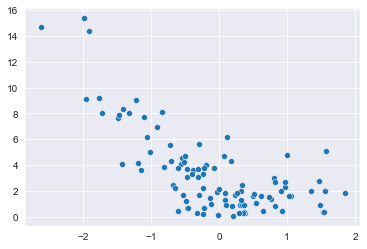

rmse: 1.7628414250161981 
mae: 1.506022520933124 
mape: 1.9299064131270842 
r^2: 0.43574194403285704


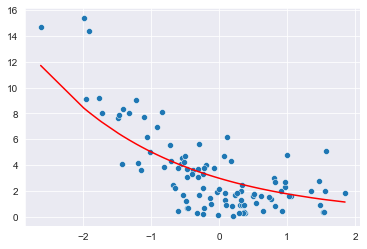

rmse: 1.9681248812764383 
mae: 1.70436354799192 
mape: 2.1050510051643236 
r^2: 0.2966741545491923


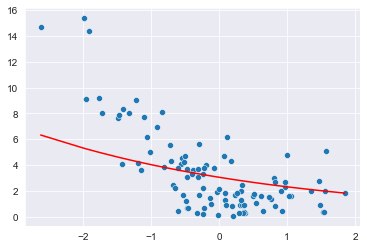

### Other Linear Models

[Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)

### K-Nearest Neighbors

$x$ - data to be predicted \
$d_i = \|x-X_{i\cdot}\|$ - distance from observed data \
$n_i=y_i|d_{i:n}$ - ith nearest class \
$NN=(n_1,\ldots,n_k)$ - nearest neighbours \
$\hat{y}=\frac{1}{k}\sum_i^k{n_i}$ \
![](media\knn.png)

rmse: 2.3190059740988955 
mae: 1.982858227282683 
mape: 2.001652096784887 
r^2: 0.2983325214032715


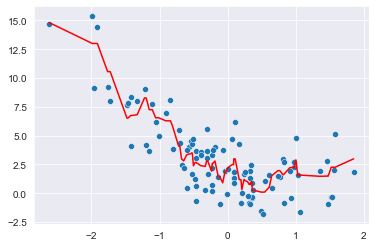

rmse: 2.136570894133743 
mae: 1.7966730431954798 
mape: 1.9114702780723714 
r^2: 0.40438965982987607


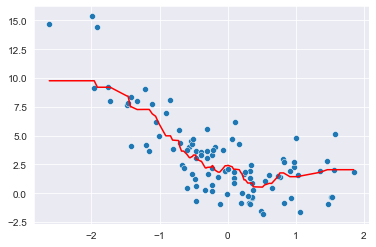

### Scaling

#### Standarization

$$\tilde{X}=\frac{X-\bar{X}}{\sigma_X}$$


#### Min-Max
$$\tilde{X}=\frac{X-\min{X}}{\max{X}-\min{X}}$$

[Other Scalers](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

rmse: 2.5941881740230377 
mae: 2.1633049864497 
mape: 2.1608761293853282 
r^2: 0.12192712060870692


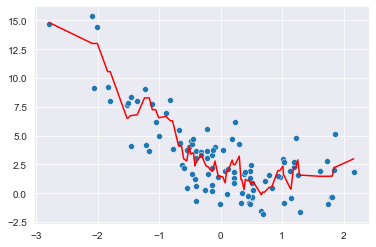

### Decision Trees

![](media\decision_tree.png)

$R_p$ - parent node \
$R_l,R_r$ - left and right nodes \
$S:R_p\rightarrow \{R_l,R_r\}$ - split \
$\hat{y}_a=\frac{1}{|R_a|}\sum_{\{y_i\in R_a\}}{y_i}$ - prediction \
$L(R_a)=\frac{1}{|R_a|}\sum_{i=1}^{|R_a|}{\left(y_i-\hat{y}_a\right)^2}$ - Loss Function (MSE) \
$IG(S)=L(R_p)-\left(P(R_l)L(R_l)+P(R_r)L(R_p)\right)$ - Information Gain \
$S=\operatorname{argmax}_{S^{*}}IG\left(S^{*}\right)$

### Support Vector Machines

![](media\svm.png)
$\hat{y}_i=w^TX_i-b$ - prediction \
$|y_i-\hat{y}_i|<\varepsilon$ - constraint \
$w=\operatorname{argmax}_{w^{*}}{\frac{2}{\left\|w^{*}\right\|}}$ - margin size

#### Soft margins
$$L=\lambda\|w\|^2+\frac{1}{n}\sum_i^n{\max{\left(0,|y_i-\hat{y}_i|-\varepsilon\right)}}$$
$w=\operatorname{argmin}_{w^{*}}{L}$

## Cross Validation

![](media\cv.jpg)

### Hyperparameters Tuning

## Multioutput

$y_i=(y_i^{(1)},y_i^{(2)},\ldots,y_i^{(m)})$
$f(X_i)=\hat{y}_i=(\hat{y}_i^{(1)},\hat{y}_i^{(2)},\ldots,\hat{y}_i^{(m)})=(f^{(1)}(X_i),f^{(2)}(X_i),\ldots,f^{(m)}(X_i))$